In [1]:
import numpy as np
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
import matplotlib.font_manager as fm

# 한글 폰트 설정 (예: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows의 경우
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호가 깨지는 것을 방지

# 폰트 확인
print([f.name for f in fm.fontManager.ttflist if 'Malgun' in f.name])

['Malgun Gothic', 'Malgun Gothic', 'Malgun Gothic']


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('최종2411022.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: '최종2411022.csv'

### 상의

In [20]:
vec_top = df['TOP_RGB']
vec_top_array = np.array(vec_top)
vec_top_array

array(['(102, 106, 107)', '(119, 149, 197)', '(133, 107, 96)', ...,
       '(41, 87, 173)', '(81, 81, 74)', '(138, 138, 136)'], dtype=object)

In [21]:
from ast import literal_eval

def convert_rgb_string_to_array(rgb_string):
    try:
        return np.array(literal_eval(rgb_string))
    except (ValueError, SyntaxError):
        print(f"변환 오류가 발생한 값: {rgb_string}")
        return np.array([0, 0, 0])  # 기본값으로 설정

In [22]:
vec_top_array = np.array([convert_rgb_string_to_array(rgb) for rgb in df['TOP_RGB']])
vec_top_array

array([[102, 106, 107],
       [119, 149, 197],
       [133, 107,  96],
       ...,
       [ 41,  87, 173],
       [ 81,  81,  74],
       [138, 138, 136]])

In [26]:
from sklearn.cluster import estimate_bandwidth

# 대역폭 추정
bandwidth = estimate_bandwidth(vec_top_array, quantile=0.05)
mean_shift = MeanShift(bandwidth=bandwidth)
labels_ms = mean_shift.fit_predict(vec_top_array)       # 클러스터 라벨
cluster_centers_ms = mean_shift.cluster_centers_        # 클러스터 중심점

In [32]:
unique_labels_ms = np.unique(labels_ms)
print("고유한 Mean Shift 레이블:", unique_labels_ms)

고유한 Mean Shift 레이블: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [ ]:
print("클러스터 중심점 (대표 색상):")
print(cluster_centers_ms)

클러스터 중심점 (대표 색상):
[[ 38.41463415  42.23902439  42.26341463]
 [ 27.62569832  31.89944134  32.38547486]
 [ 56.27108434  59.40361446  57.46385542]
 [ 81.44186047  84.39534884  81.96511628]
 [100.16666667 103.16666667 100.25      ]
 [130.31818182 129.95454545 124.40909091]
 [117.38636364 117.38636364 112.79545455]
 [159.76190476 160.28571429 153.45238095]
 [181.3902439  181.92682927 176.19512195]
 [143.94117647 145.02941176 140.91176471]
 [194.62068966 194.20689655 187.72413793]
 [ 70.14285714  49.21428571  32.42857143]
 [118.69230769 136.84615385 155.07692308]
 [104.53846154  79.61538462  59.53846154]
 [139.6        109.          87.3       ]
 [137.4        148.5        163.4       ]
 [ 60.77777778  85.77777778 111.77777778]
 [ 93.625      117.125      134.25      ]
 [ 76.57142857 101.28571429 123.14285714]
 [ 87.33333333  40.66666667  36.        ]
 [ 31.          60.5        117.5       ]
 [ 20.66666667  39.          77.33333333]
 [221.5        223.         224.        ]
 [113.5        1

In [35]:
df['Top_cluster']=labels_ms
df['Top_cluster_center'] = [cluster_centers_ms[label] for label in labels_ms]
df

,TOP_RGB,BOTTOM_RGB,Top_cluster,Top_cluster_center
0,"(102, 106, 107)","(103, 112, 119)",4,"[100.16666666666667, 103.16666666666667, 100.25]"
1,"(119, 149, 197)","(74, 99, 108)",23,"[113.5, 150.0, 195.5]"
2,"(133, 107, 96)","(56, 67, 70)",14,"[139.6, 109.0, 87.3]"
3,"(136, 133, 131)","(27, 30, 29)",5,"[130.3181818181818, 129.95454545454547, 124.40..."
4,"(25, 29, 23)","(52, 57, 52)",1,"[27.625698324022345, 31.899441340782122, 32.38..."
...,...,...,...,...
1067,"(68, 76, 83)","(49, 51, 50)",3,"[81.44186046511628, 84.3953488372093, 81.96511..."
1068,"(32, 47, 60)","(60, 78, 86)",0,"[38.41463414634146, 42.239024390243905, 42.263..."
1069,"(41, 87, 173)","(177, 191, 204)",38,"[41.0, 87.0, 173.0]"
1070,"(81, 81, 74)","(70, 79, 72)",3,"[81.44186046511628, 84.3953488372093, 81.96511..."


In [34]:
df['Top_cluster'].value_counts()

Top_cluster
1     195
2     188
0     154
3     109
4      58
8      45
7      44
5      37
6      32
10     30
9      29
11     18
13     17
12     14
14     11
16     11
17     10
15      9
22      9
19      8
21      8
18      7
20      5
28      4
23      3
24      2
25      2
37      1
29      1
31      1
32      1
30      1
33      1
36      1
26      1
27      1
34      1
39      1
35      1
38      1
Name: count, dtype: int64

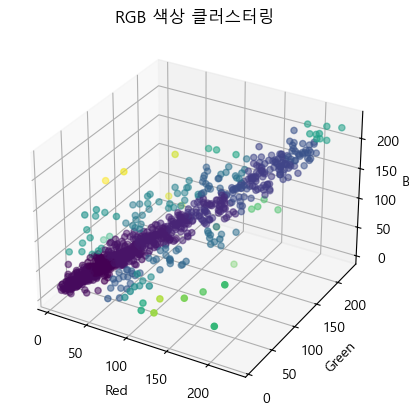

In [36]:
# plt 시각화
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(vec_top_array[:, 0], vec_top_array[:, 1], vec_top_array[:, 2], c=labels_ms, cmap='viridis')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.title('RGB 색상 클러스터링')
plt.show()


In [39]:
# Plotly를 이용한 3D 시각화
import plotly.express as px

fig = px.scatter_3d(
    x=vec_top_array[:, 0],  # Red
    y=vec_top_array[:, 1],  # Green
    z=vec_top_array[:, 2],  # Blue
    color=labels_ms.astype(str),  # 클러스터 레이블을 색상으로 사용 (문자열로 변환)
    labels={'x': 'Red', 'y': 'Green', 'z': 'Blue'},
    title='RGB 색상 클러스터링 (Plotly)'
)
fig.update_traces(marker=dict(size=1.8))  # 마커 크기를 3으로 설정

fig.show()